<a href="https://colab.research.google.com/github/lbcarv1972/ICU-Liberation/blob/main/ICU_Liberation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Montagem do Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## ***Autenticar usuário***

In [ ]:
from google.colab import auth
auth.authenticate_user()

# **Importação de bibliotecas**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np # Import numpy and define the 'np' alias
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf  # Use smf for formula API
import statsmodels.api as sm # Import the main statsmodels API
import seaborn as sns


# **Obtenção de Credenciais**

In [ ]:
# Obtenha credenciais e autorize usando 'default' em vez de 'GoogleCredentials'
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# **Importação da planilha Google**

In [ ]:
# Substitua 'your_spreadsheet_id' pelo ID real da sua Planilha Google
spreadsheet_id = '1MIQ60QzzUd6JaOgQomSVOtl_yikHh-JPHNu0z5-pLAs'
sheet = gc.open_by_key(spreadsheet_id)

# **Definição da planilha de Trabalho**

In [ ]:
# Substitua 'Entradas' pelo nome da planilha que você deseja acessar
worksheet = sheet.worksheet('Entradas')

# Obter todos os dados como uma lista de listas
data = worksheet.get_all_values()

# Obter dados como um Pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# **Conversão de Data para o formato Mes_Ano**

In [ ]:
# Converta a coluna 'Data' para o tipo datetime
# Use the dayfirst=True argument to correctly parse dates in the format dd/mm/yyyy
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)

# Converta a coluna de Data para Mes_Ano
df['Mes_Ano'] = df['Data'].dt.strftime('%m-%Y')

# Converta a coluna Mes_Ano para categórica
df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

# **Crie o gráfico para Cabeceira elevada por Mes_Ano**

<ipython-input-8-ec9ea6a14bc3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Cabeceira_elevada'])['Cabeceira_elevada'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Cabeceira_elevada,,,,,,,,,,,
Não,3,3,14,5,6,4,4,2,4,1,7
Sim,108,225,254,268,274,283,257,274,246,112,240


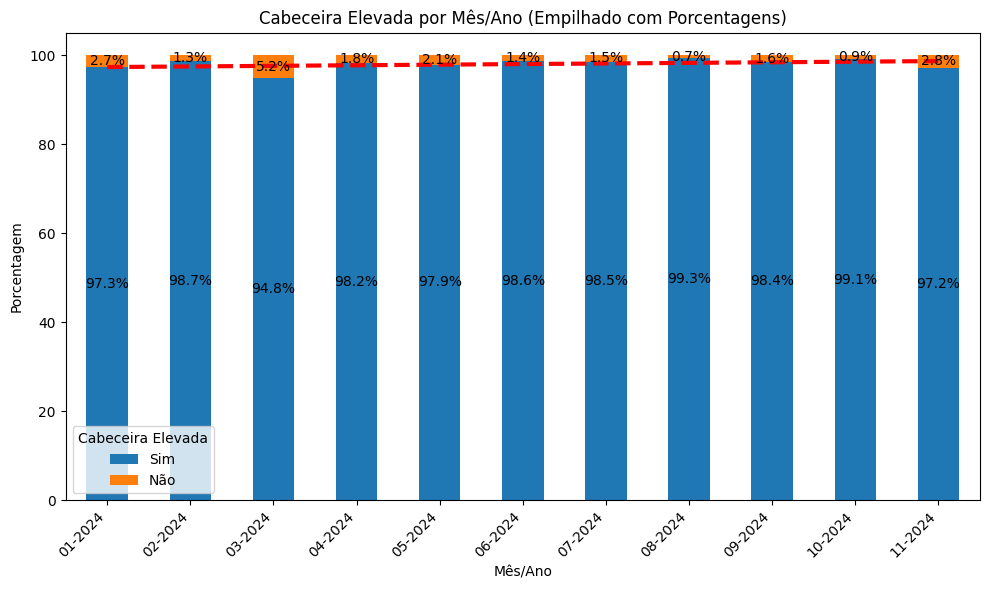

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Cabeceira_elevada'])['Cabeceira_elevada'].count().unstack()

# Reordene as colunas para ter "Não" por último (embaixo)
grouped_data = grouped_data[['Sim', 'Não']]  # Order: 'Sim', then 'Não'

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Cabeceira_elevada'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Cabeceira_elevada por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalize o gráfico
plt.title('Cabeceira Elevada por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cabeceira Elevada')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Adicione a linha de tendência (destacada)
x = np.arange(len(percentage_data))
y = percentage_data['Sim'].values  # Assuming you want the trend for 'Sim'
z = np.polyfit(x, y, 1)  # Ajusta um polinômio de grau 1 (linha reta)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=3)  # "r--" para linha tracejada vermelha, linewidth para espessura

plt.tight_layout()
plt.show()

# **Crie o gráfico para Protocolo glicemico por Mes_Ano**

<ipython-input-9-a58c8ad31a8a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Protocolo_glicemico'])['Protocolo_glicemico'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Protocolo_glicemico,,,,,,,,,,,
Não,0,6,14,12,2,24,37,11,16,0,28
Sim,111,222,254,261,278,263,224,265,234,113,219


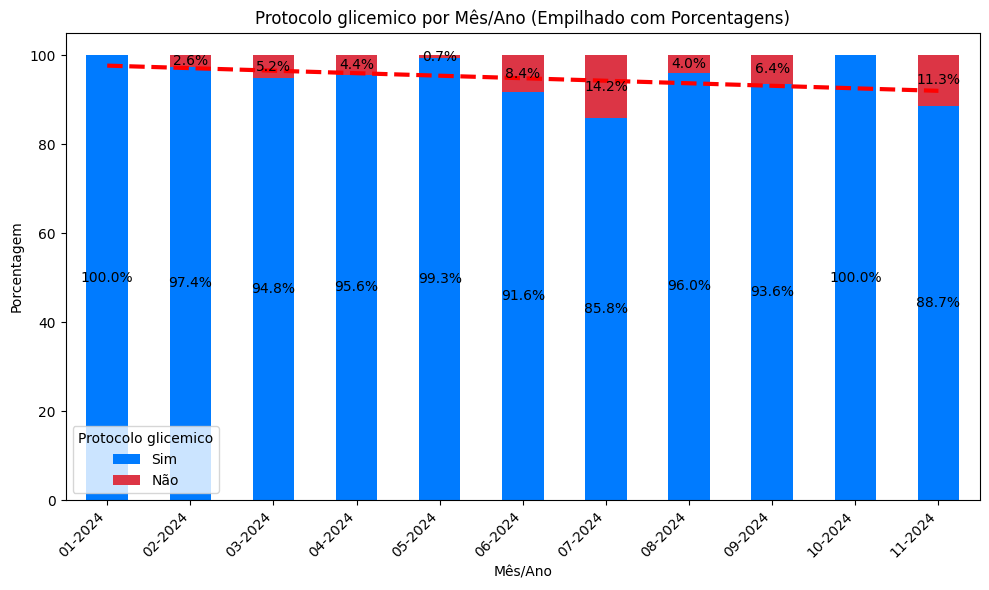

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Protocolo_glicemico'])['Protocolo_glicemico'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Protocolo_glicemico'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Protocolo_glicemico por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)
# Reordene as colunas para ter "Não" por último (embaixo)
grouped_data = grouped_data[['Sim', 'Não']]  # Order: 'Sim', then 'Não'

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Defina as cores desejadas para as colunas "Sim" e "Não"
colors = ['#007bff', '#dc3545']  # Azul para "Sim", Vermelho para "Não"

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Personalize o gráfico
plt.title('Protocolo glicemico por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Protocolo glicemico')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Adicione a linha de tendência (destacada)
x = np.arange(len(percentage_data))
y = percentage_data['Sim'].values  # Assuming you want the trend for 'Sim'
z = np.polyfit(x, y, 1)  # Ajusta um polinômio de grau 1 (linha reta)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=3)  # "r--" para linha tracejada vermelha, linewidth para espessura

plt.tight_layout()
plt.show()

# **Crie o gráfico para Prevenção TEV por Mes_Ano**

<ipython-input-10-130d8d607f4e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Prevenção_TEV'])['Prevenção_TEV'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Prevenção_TEV,,,,,,,,,,,
Anticoagulação plena,0,0,0,0,0,0,0,0,0,1,0
CPI,39,91,114,92,121,65,118,90,82,51,100
Enoxaparina,69,133,139,161,151,199,127,176,153,56,135
Não,3,4,15,20,8,23,16,10,15,5,12


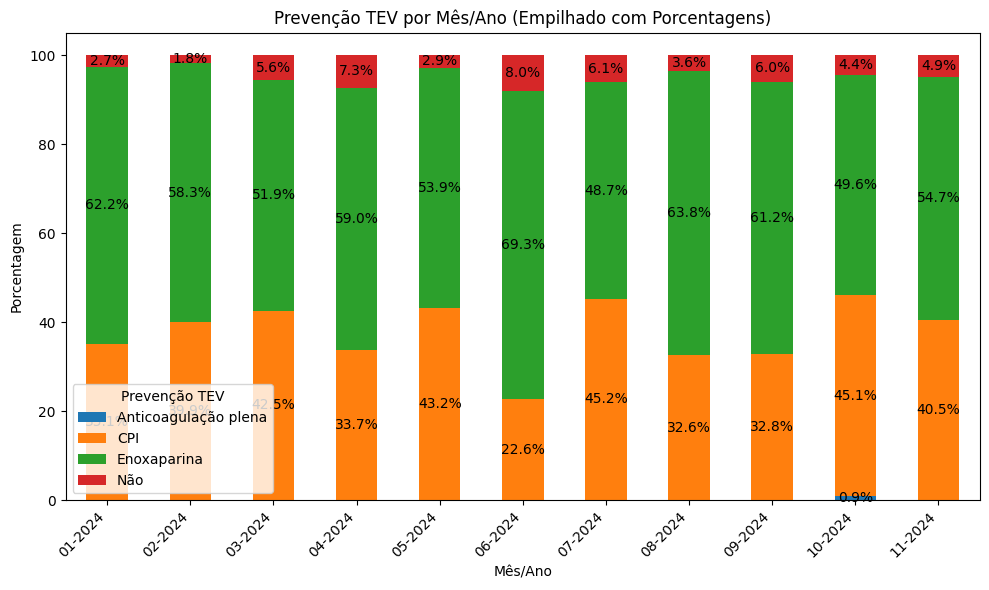

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Prevenção_TEV'])['Prevenção_TEV'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Prevenção_TEV'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Prevenção_TEV por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalize o gráfico
plt.title('Prevenção TEV por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prevenção TEV')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para Prevenção gastrite por Mes_Ano**

<ipython-input-11-133efb0ab1fb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Prevenção_gastrite'])['Prevenção_gastrite'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Prevenção_gastrite,,,,,,,,,,,
Dieta,0,1,7,42,57,56,63,106,101,31,74
Esomeprazol,0,0,26,31,48,50,18,40,31,20,24
Não,0,7,13,23,15,19,9,8,14,4,17
Omeprazol,111,220,222,177,160,162,171,122,104,58,132


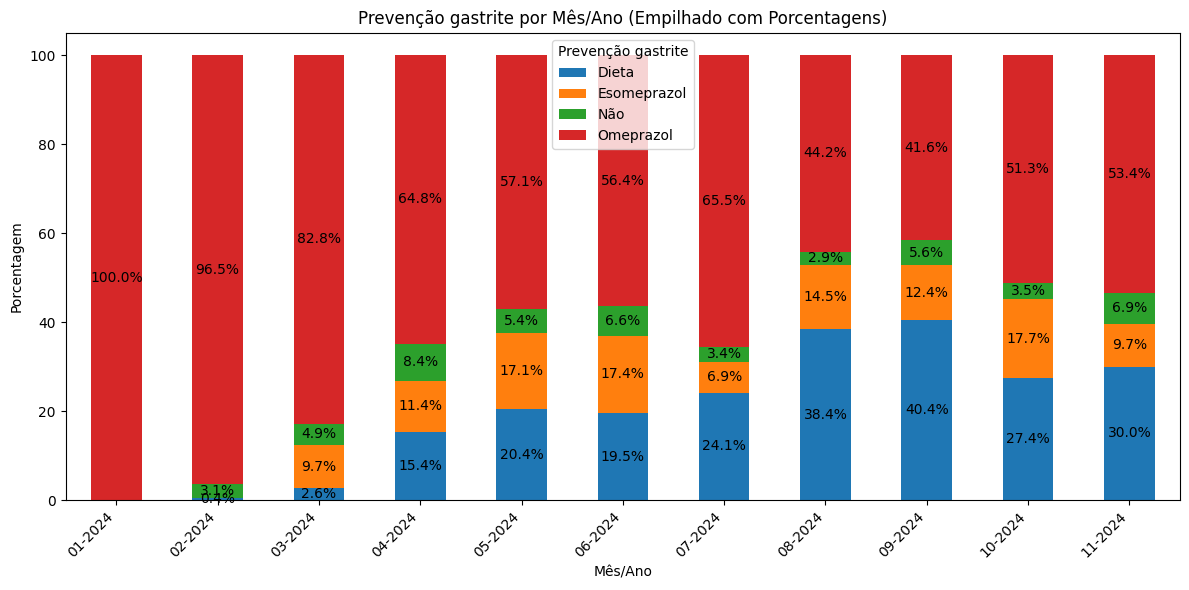

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Prevenção_gastrite'])['Prevenção_gastrite'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Prevenção_gastrite'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Prevenção_gastrite por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Personalize o gráfico
plt.title('Prevenção gastrite por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Prevenção gastrite')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para Dieta por Mes_Ano**

<ipython-input-12-fa9678224167>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Dieta'])['Dieta'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Dieta,,,,,,,,,,,
Enteral,60,135,121,116,115,75,65,114,123,27,67
Não,20,52,82,88,87,116,88,45,51,38,60
Oral,31,41,65,61,78,96,108,117,76,47,120
Parenteral,0,0,0,8,0,0,0,0,0,1,0


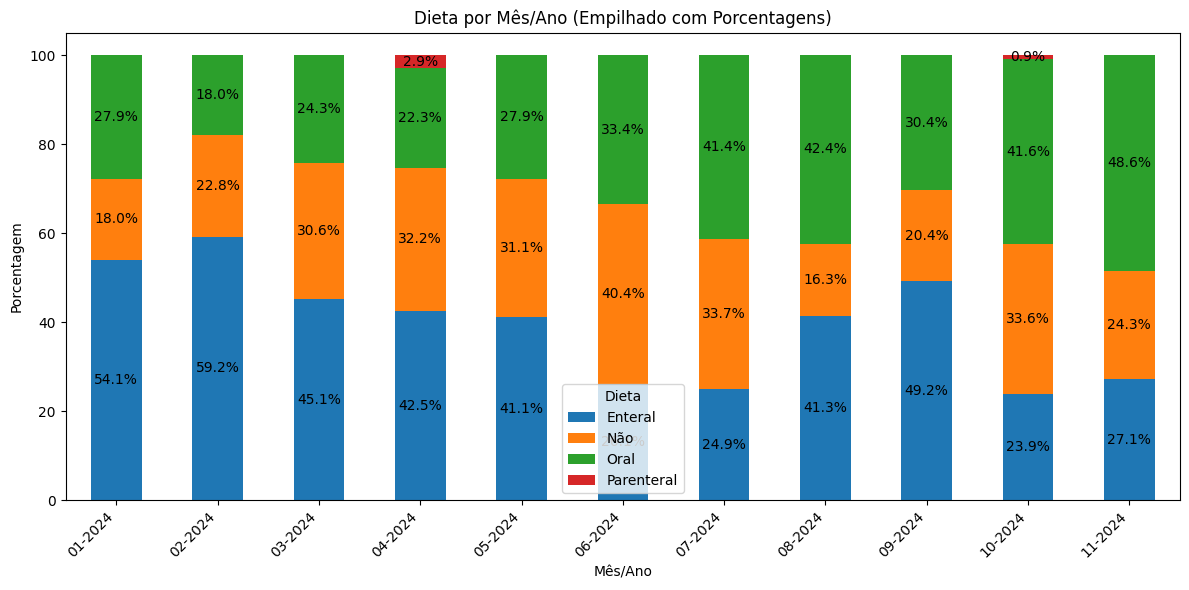

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Dieta'])['Dieta'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Dieta'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Dieta por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Personalize o gráfico
plt.title('Dieta por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dieta')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para Sondagem vesical por Mes_Ano**

<ipython-input-13-2438de62ff08>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Sondagem_vesical'])['Sondagem_vesical'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Sondagem_vesical,,,,,,,,,,,
Não,111,225,171,202,145,163,177,183,143,83,175
SVA,0,0,9,13,22,29,4,22,39,7,30
SVD,0,3,88,58,113,95,80,71,68,23,42


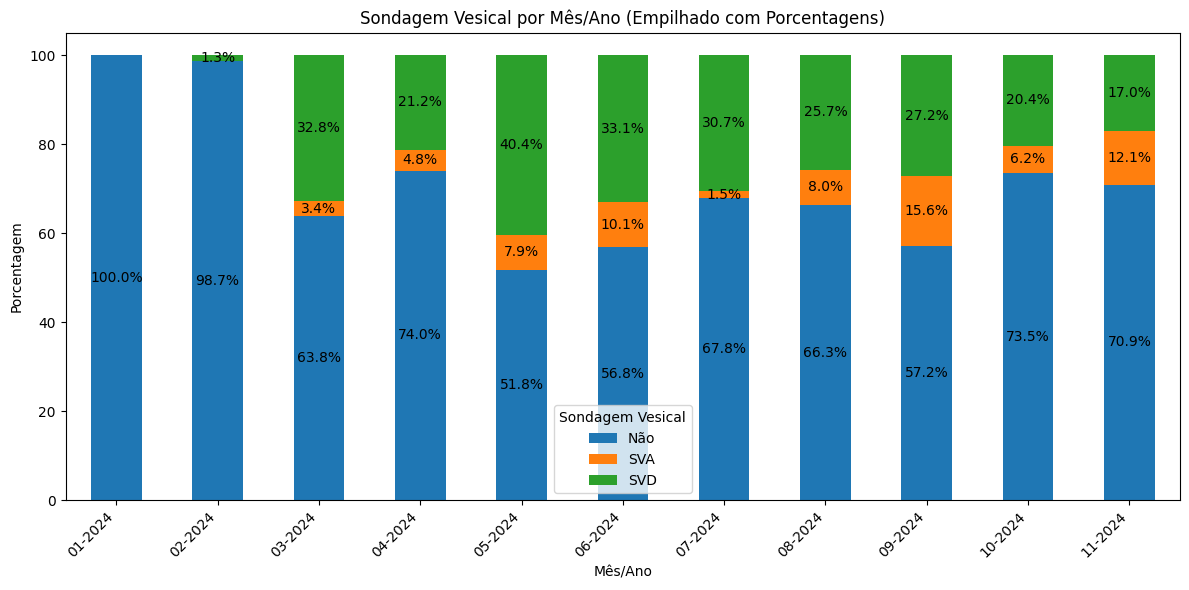

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Sondagem_vesical'])['Sondagem_vesical'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Sondagem_vesical'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Sondagem_vesical por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Personalize o gráfico
plt.title('Sondagem Vesical por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sondagem Vesical')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para END por Mes_Ano**

<ipython-input-14-087fa9e83d25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['END_Category'] = pd.cut(


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
END_Category,,,,,,,,,,,
0 - sem dor,81,89,92,108,145,159,159,160,130,77,169
1 a 3 - dor leve,8,3,8,4,6,0,2,1,2,2,2
4 a 7 - dor moderada,6,13,13,16,9,12,11,9,7,6,6
8 a 10 - dor forte,5,7,5,3,5,4,4,2,3,0,1


<ipython-input-14-087fa9e83d25>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['Mes_Ano', 'END_Category'])['END_Category'].count().unstack()


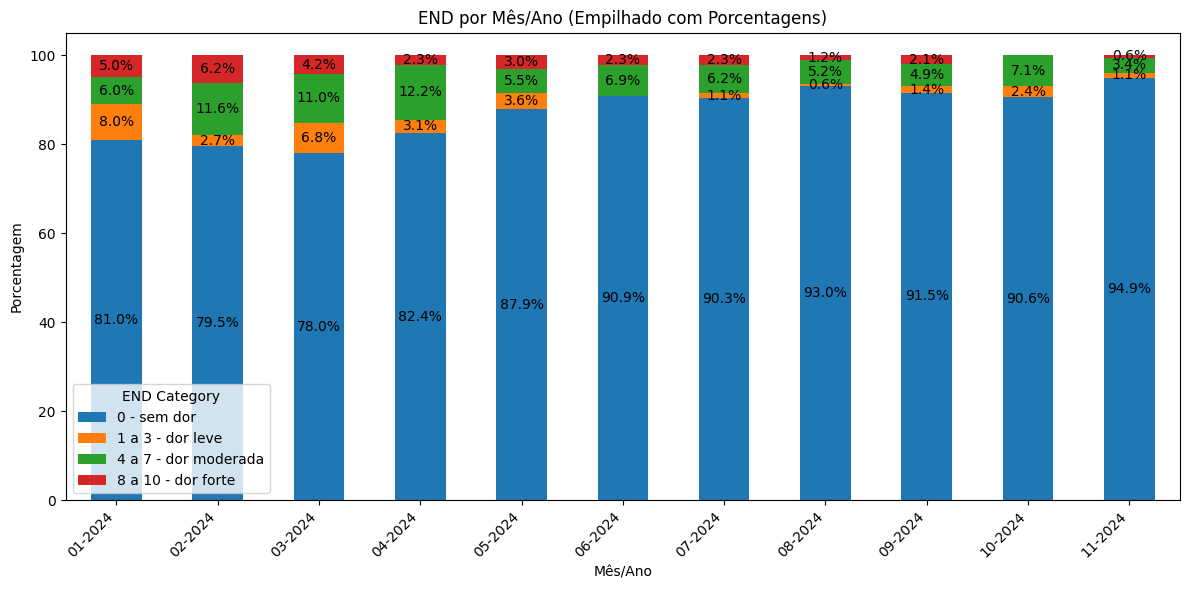

In [ ]:
# 1. Create categories for END column
# Use pd.cut to create categories based on the ranges you provided
# Convert 'END' column to numeric, handling errors by setting them to NaN
df['END'] = pd.to_numeric(df['END'], errors='coerce')

# Filter out rows with 'NA' in the 'END' column
df_filtered = df.dropna(subset=['END'])

df_filtered['END_Category'] = pd.cut(
    df_filtered['END'],
    bins=[-1, 0, 3, 7, 10],  # Define bin edges, -1 to include 0
    labels=['0 - sem dor', '1 a 3 - dor leve', '4 a 7 - dor moderada', '8 a 10 - dor forte'],
    right=True,  # Include right edge in the bin
    include_lowest=False,  # Don't include the lowest value (-1)
    duplicates='drop'  # Handle potential duplicate edges
)

# Crie a tabela de contingência using the filtered DataFrame (df_filtered)
contingency_table = pd.crosstab(df_filtered['END_Category'], df_filtered['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de END_Category por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# 2. Group data and calculate percentages
grouped_data = df_filtered.groupby(['Mes_Ano', 'END_Category'])['END_Category'].count().unstack()
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# 3. Create stacked column chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# 4. Customize plot
plt.title('END por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='END Category')

# 5. Add percentage values to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para BPS por Mes_Ano**

<ipython-input-15-5ef3b5ef1ded>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BPS'] = pd.to_numeric(df_filtered['BPS'], errors='coerce')
<ipython-input-15-5ef3b5ef1ded>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BPS_Category'] = pd.cut(


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
BPS_Category,,,,,,,,,,,
3 - sem dor,45,107,116,130,97,109,76,96,100,31,75
4 a 7 - dor leve,16,35,24,27,21,7,6,7,10,6,4
8 a 11 - dor moderada,0,0,1,1,0,0,0,0,2,0,0


<ipython-input-15-5ef3b5ef1ded>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['Mes_Ano', 'BPS_Category'])['BPS_Category'].count().unstack()


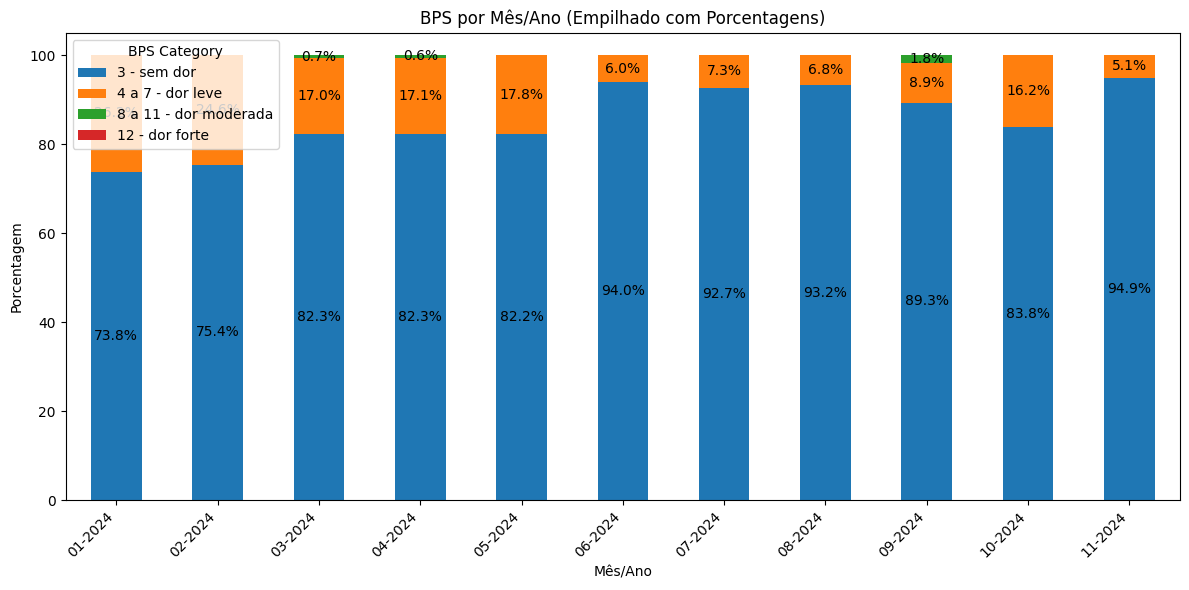

In [ ]:
# 1. Exclude 'NA' values from BPS data
df_filtered = df[df['BPS'] != 'NA']  # Filter out rows where BPS is 'NA'

# 2. Convert BPS to numeric
df_filtered['BPS'] = pd.to_numeric(df_filtered['BPS'], errors='coerce')

# 3. Create categories for BPS
df_filtered['BPS_Category'] = pd.cut(
    df_filtered['BPS'],
    bins=[2, 3, 7, 11, 12],  # Bin edges to define categories
    labels=['3 - sem dor', '4 a 7 - dor leve', '8 a 11 - dor moderada', '12 - dor forte'],
    right=True,
    include_lowest=False
)


# Crie a tabela de contingência
contingency_table = pd.crosstab(df_filtered['BPS_Category'], df_filtered['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de BPS_Category por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# 4. Group data and calculate percentages
grouped_data = df_filtered.groupby(['Mes_Ano', 'BPS_Category'])['BPS_Category'].count().unstack()
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# 5. Create stacked column chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# 6. Customize plot
plt.title('BPS por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='BPS Category')

# 7. Add percentage values to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


# **Crie o gráfico para RASS por Mes_Ano**

Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
RASS_Category,,,,,,,,,,,
-4 e -5 - sedação profunda e coma,46,92,91,101,78,101,66,52,38,9,58
-2 e -3 - sedação leve a moderada,5,20,14,26,22,13,12,21,30,15,9
0 e -1 - sedação ideal,54,108,148,128,159,165,172,197,170,82,171
+1 a +5 - agitação,6,8,15,18,21,8,11,6,12,7,9


<ipython-input-16-cccd25b29005>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_filtered.groupby(['Mes_Ano', 'RASS_Category'])['RASS_Category'].count().unstack()


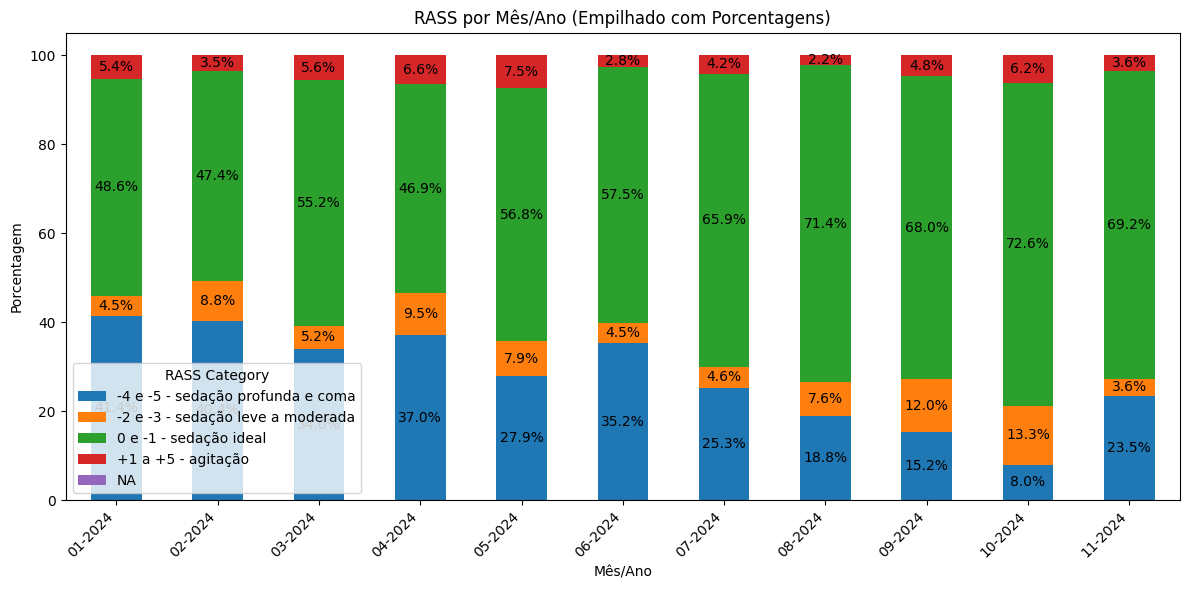

In [ ]:
# 1. Convert RASS to numeric and filter values 'NA'
df['RASS'] = pd.to_numeric(df['RASS'], errors='coerce')
df_filtered = df[df['RASS'].notna()]

# 2. Create categories for RASS, including 'NA'
df_filtered['RASS_Category'] = pd.cut(df_filtered['RASS'],
    bins=[-5, -3, -1, 1, 6],  # Bin edges
    labels=['-4 e -5 - sedação profunda e coma', '-2 e -3 - sedação leve a moderada', '0 e -1 - sedação ideal', '+1 a +5 - agitação'],  # Labels
    right=False,  # Include left edge, exclude right edge
    include_lowest=True,  # Include the lowest value (-6 in this case)
    duplicates='drop'  # Drop duplicate edges if any
)


# Handle 'NA' values separately (if needed)
df_filtered['RASS_Category'] = df_filtered['RASS_Category'].cat.add_categories('NA')  # Add 'NA' category
df_filtered.loc[df_filtered['RASS'].isna(), 'RASS_Category'] = 'NA'  # Assign 'NA' to missing values

# Crie a tabela de contingência
contingency_table = pd.crosstab(df_filtered['RASS_Category'], df_filtered['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de RASS_Category por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# 3. Filter out 'NA' category
df_filtered = df_filtered[df_filtered['RASS_Category'] != 'NA']

# 4. Group data and calculate percentages using the filtered DataFrame
grouped_data = df_filtered.groupby(['Mes_Ano', 'RASS_Category'])['RASS_Category'].count().unstack()
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# 5. Create stacked column chart
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# 6. Customize plot
plt.title('RASS por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')

# 7. Set legend (no need to filter as 'NA' is already excluded)
ax.legend(title='RASS Category')

# 8. Add percentage values to bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para CAM-ICU por Mes_Ano**

<ipython-input-17-13835bdd8298>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'CAM-ICU'])['CAM-ICU'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
CAM-ICU,,,,,,,,,,,
NA,46,99,101,118,94,110,74,55,48,19,62
Negativo,42,69,108,82,100,99,136,116,97,42,126
Positivo,23,60,59,73,86,78,51,105,105,52,59


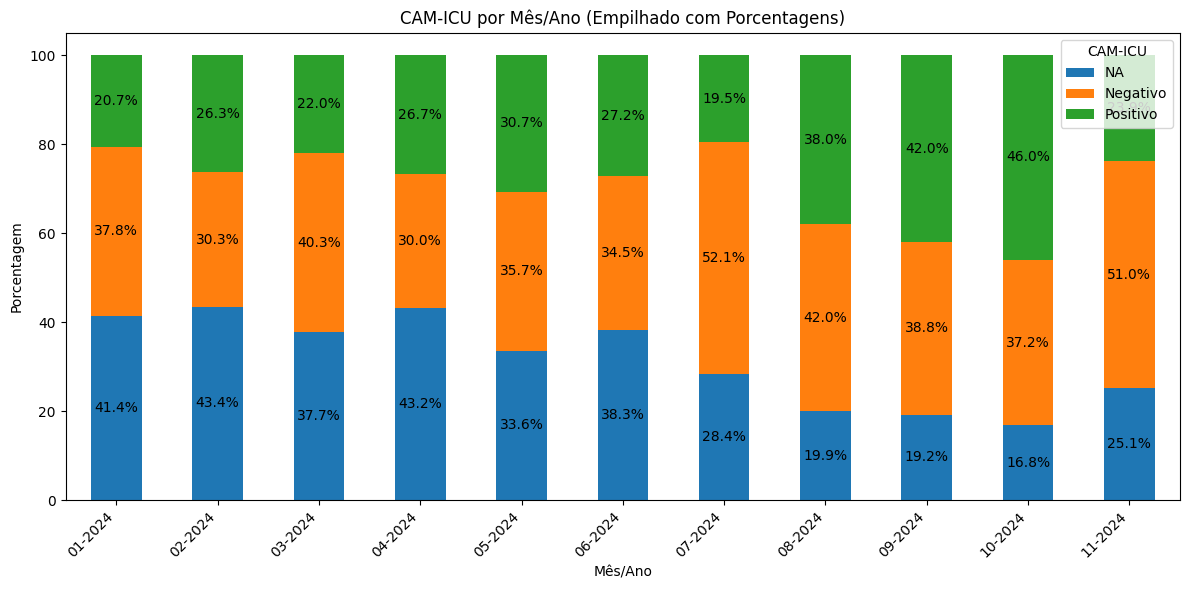

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'CAM-ICU'])['CAM-ICU'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['CAM-ICU'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de CAM-ICU por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Personalize o gráfico
plt.title('CAM-ICU por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='CAM-ICU')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para Analgésico_sedativo por Mes_Ano**

<ipython-input-18-c2fd350e3c50>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Analgésico_sedativo'])['Analgésico_sedativo'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Analgésico_sedativo,,,,,,,,,,,
Apenas analgesia,5,35,0,5,21,11,4,0,4,5,0
Contínuo,31,65,103,106,112,98,64,66,100,17,50
Intermitente,0,5,16,29,18,17,25,38,48,31,60
Se necessário (SN),75,123,149,133,129,161,168,172,98,60,137


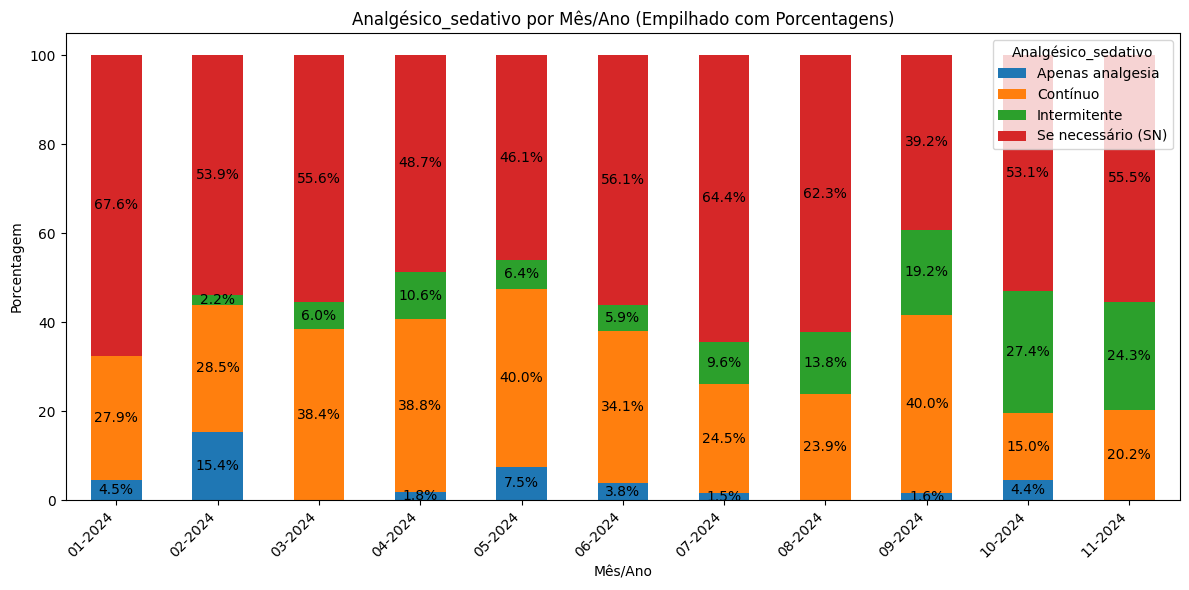

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Analgésico_sedativo'])['Analgésico_sedativo'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Analgésico_sedativo'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Analgésico_sedativo por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Personalize o gráfico
plt.title('Analgésico_sedativo por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Analgésico_sedativo')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para TDE por Mes_Ano**

<ipython-input-19-3dcc7f11fd85>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'TDE'])['TDE'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
TDE,,,,,,,,,,,
NA,0,0,0,0,0,5,145,197,149,89,191
Não- Outro Motivo,85,167,234,145,210,191,35,2,0,0,2
Não- Falha de segurança,0,0,13,42,10,37,25,35,27,9,22
Sim,26,61,21,86,60,54,56,42,74,15,32


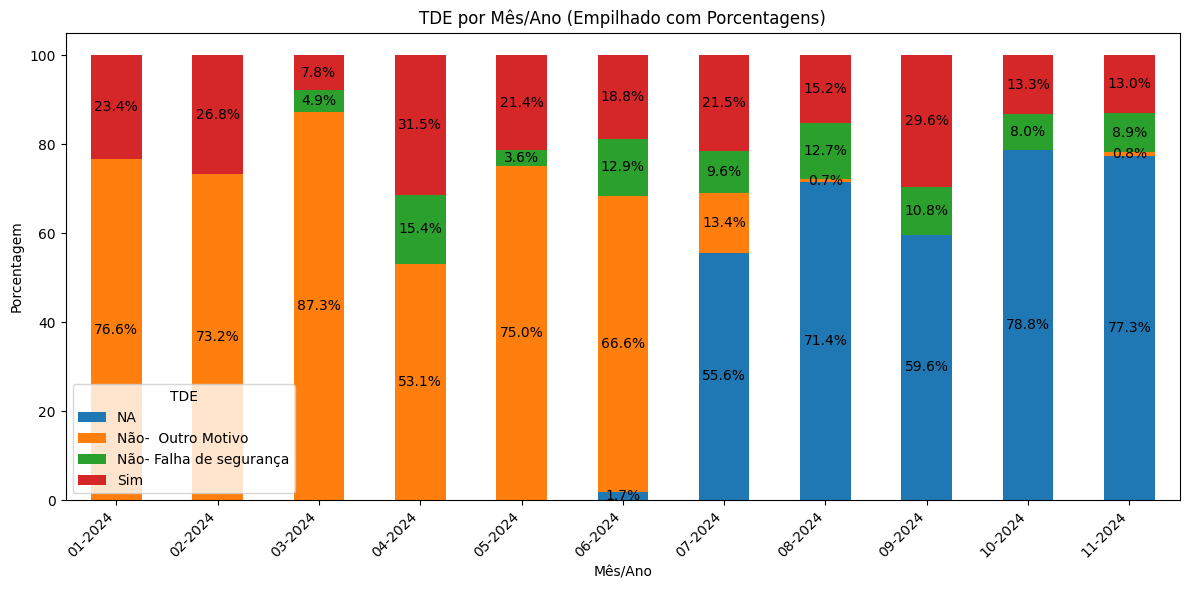

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'TDE'])['TDE'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['TDE'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de TDE por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Personalize o gráfico
plt.title('TDE por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TDE')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para TRE por Mes_Ano**

<ipython-input-20-cc60f7980fd6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'TRE'])['TRE'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
TRE,,,,,,,,,,,
NA,0,0,0,0,0,5,143,201,142,93,189
Não- Outro Motivo,111,228,208,164,223,194,41,2,0,0,1
Não- Falha de segurança,0,0,46,46,17,65,45,39,50,10,25
Sim,0,0,14,63,40,23,32,34,58,10,32


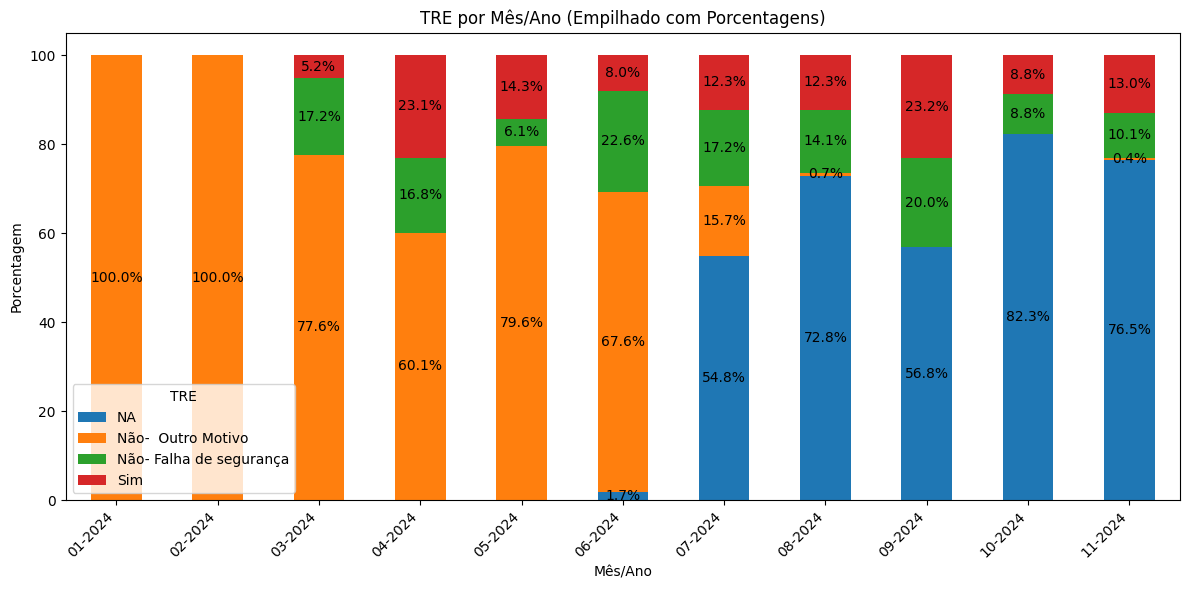

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'TRE'])['TRE'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['TRE'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de TRE por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Personalize o gráfico
plt.title('TRE por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TRE')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Crie o gráfico para Mobilização por Mes_Ano**

<ipython-input-21-995d2bb23c53>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Mes_Ano', 'Mobilização'])['Mobilização'].count().unstack()


Mes_Ano,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,07-2024,08-2024,09-2024,10-2024,11-2024
Mobilização,,,,,,,,,,,
1,53,136,130,150,116,135,76,79,58,29,58
2,17,17,34,35,36,41,39,34,81,27,65
3,7,29,31,36,52,30,29,69,44,5,17
4,16,8,23,29,21,31,32,27,19,19,43
5,18,38,50,23,55,50,85,67,48,33,64


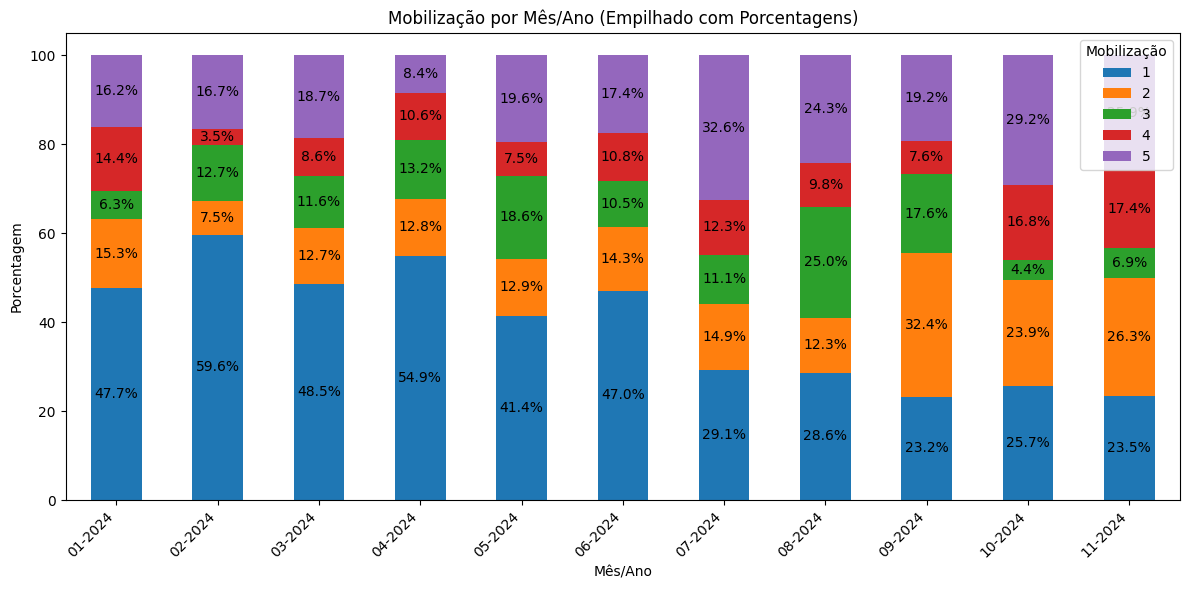

In [ ]:
# Agrupe os dados e calcule a contagem para cada categoria
grouped_data = df.groupby(['Mes_Ano', 'Mobilização'])['Mobilização'].count().unstack()

# Crie a tabela de contingência
contingency_table = pd.crosstab(df['Mobilização'], df['Mes_Ano'])

# Formate a tabela com as classes de RASS nas linhas e os meses nas colunas
rass_table = contingency_table.T  # Transpor a tabela para ter meses como colunas

# Transpor a tabela para ter meses como colunas e variáveis como linhas
rass_table_transposed = rass_table.T  # .T transpõe a tabela

# Aplique estilo à tabela transposta
styled_table = rass_table_transposed.style.set_properties(**{
    'border': '1px solid black',  # Define a borda da tabela
    'text-align': 'center',  # Centraliza o texto nas células
}).background_gradient(cmap='Blues').set_caption("Distribuição das Classes de Mobilização por Mês").format(precision=0) # Define o título da tabela e a precisão dos números

# Exiba a tabela com estilo
display(styled_table)

# Calcule as porcentagens
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Crie o gráfico de colunas empilhadas com porcentagens
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Increased figsize for better readability

# Personalize o gráfico
plt.title('Mobilização por Mês/Ano (Empilhado com Porcentagens)')
plt.xlabel('Mês/Ano')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mobilização')

# Adicione os valores das porcentagens nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Adicione rótulo apenas se a altura for maior que 0
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# ***Análise de Variância***

In [ ]:
# Crie uma nova variável binária 'Cabeceira elevada_Target'
df['Cabeceira_elevada_Target'] = df['Cabeceira_elevada'].apply(lambda x: 1 if x == 'Sim' else 0)


In [ ]:
# Crie uma nova variável binária 'Protocolo glicemico_Target'
df['Protocolo_glicemico_Target'] = df['Protocolo_glicemico'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
# Assuma como meta para Prevenção de Gastrite todas as respostas exceto 'Não'

# Create a new binary variable 'Prevencao_gastrite_Target'
df['Prevencao_gastrite_Target'] = df['Prevenção_gastrite'].apply(lambda x: 1 if x != 'Não' else 0)

In [ ]:
# Assuma como meta para Prevenção TEV todas as respostas exceto 'Não'

# Create a new binary variable 'Prevencao_TEV_Target'
df['Prevencao_TEV_Target'] = df['Prevenção_TEV'].apply(lambda x: 1 if x != 'Não' else 0)


In [ ]:
# Assuma como meta para Dieta todas as respostas exceto 'Não'

# Create a new binary variable 'Dieta_Target'
df['Dieta_Target'] = df['Dieta'].apply(lambda x: 1 if x != 'Não' else 0)

In [ ]:
# Assuma como meta para Sondagem vesical a resposta 'Não'

# Crie uma nova variável binária 'Sondagem_Vesical_Target'
df['Sondagem_vesical_Target'] = df['Sondagem_vesical'].apply(lambda x: 1 if x == 'Não' else 0)

In [ ]:
# Assuma como meta para END a resposta 0 a 3

# Converta a coluna "END" para numérica, tratando erros como NaN
df['END'] = pd.to_numeric(df['END'], errors='coerce')

# Crie uma nova variável binária 'END_Target'
df['END_Target'] = df['END'].apply(lambda x: 1 if 0 <= x <= 3 else 0)

In [ ]:
# Assuma como meta para BPS a resposta 3

# Crie uma nova variável binária 'BPS_Target'
df['BPS_Target'] = df['BPS'].apply(lambda x: 1 if x == 3 else 0)


In [ ]:
# Assuma como meta para RASS a resposta 0 e -1

# Crie uma nova variável binária 'RASS_Target'
df['RASS_Target'] = df['RASS'].apply(lambda x: 1 if x in [0, -1] else 0)


In [ ]:
# Assuma como meta para CAM-ICU a resposta Negativo

# Crie uma nova variável binária 'CAM_ICU_Target'
df['CAM_ICU_Target'] = df['CAM-ICU'].apply(lambda x: 1 if x == 'Negativo' else 0)

In [ ]:
# Assuma como meta para Analgésico/ sedativo todas as respostas exceto Contínuo

# Crie uma nova variável binária 'Analgesico_Sedativo_Target'
df['Analgesico_Sedativo_Target'] = df['Analgésico_sedativo'].apply(lambda x: 1 if x != 'Contínuo' else 0)

In [ ]:
# Assuma como meta para TDE a resposta Sim

# Crie uma nova variável binária 'TDE_Target'
df['TDE_Target'] = df['TDE'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
# Assuma como meta para TRE a resposta Sim

# Crie uma nova variável binária 'TRE_Target'
df['TRE_Target'] = df['TRE'].apply(lambda x: 1 if x == 'Sim' else 0)

In [ ]:
# Assuma como meta para Mobilização todas as respostas exceto 1

# Crie uma nova variável binária 'Mobilizacao_Target'
df['Mobilizacao_Target'] = df['Mobilização'].apply(lambda x: 1 if x != '1' else 0)

In [ ]:
# Faça a análise de todas as variáveis binárias de Entradas em relação a Mes_Ano

# Since your target variables are binary (indicating whether a certain goal was met or not) and 'Mes_Ano' is categorical, we'll use a method called Chi-squared test for independence.
# It's appropriate for testing the relationship between two categorical variables, especially when dealing with binary outcomes.

# Converta a coluna de Data para Mes_Ano
df['Mes_Ano'] = df['Data'].dt.strftime('%m-%Y')

# Converta a coluna Mes_Ano para categórica
df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

# Faça a análise de Chi-squared

# Corrected the column name to match the DataFrame:
binary_vars = ['Cabeceira_elevada_Target', 'Protocolo_glicemico_Target', 'Prevencao_gastrite_Target', 'Prevencao_TEV_Target', 'Dieta_Target', 'Sondagem_vesical_Target', 'END_Target', 'BPS_Target', 'RASS_Target', 'CAM_ICU_Target', 'Analgesico_Sedativo_Target', 'TDE_Target', 'TRE_Target', 'Mobilizacao_Target']

results = []
for var in binary_vars:
  contingency_table = pd.crosstab(df['Mes_Ano'], df[var])
  chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
  significance = "Sim" if p_val < 0.05 else "Não"  # Determine significance
  results.append([var, chi2_stat, f'{p_val:.3f}', dof, significance])

results_df = pd.DataFrame(results, columns=['Variable', 'Chi-squared Statistic', 'P-value', 'Degrees of Freedom', 'Significância'])

# Apply styling
def highlight_significance(s):
    is_significant = s == "Sim"
    return ['background-color: salmon' if v else '' for v in is_significant]

styled_results_df = results_df.style.apply(highlight_significance, subset=['Significância'])

# Display the styled table
display(styled_results_df)

,Variable,Chi-squared Statistic,P-value,Degrees of Freedom,Significância
0,Cabeceira_elevada_Target,19.582774,0.033,10,Sim
1,Protocolo_glicemico_Target,85.272445,0.000,10,Sim
2,Prevencao_gastrite_Target,22.585468,0.012,10,Sim
3,Prevencao_TEV_Target,20.010773,0.029,10,Sim
4,Dieta_Target,68.665111,0.000,10,Sim
5,Sondagem_vesical_Target,225.892524,0.000,10,Sim
6,END_Target,139.569937,0.000,10,Sim
7,BPS_Target,0.000000,1.000,0,Não
8,RASS_Target,86.649629,0.000,10,Sim
9,CAM_ICU_Target,55.414036,0.000,10,Sim


In [ ]:
#Faça a análise ANOVA das variáveis numéricas de Entradas em relação a Mes_Ano

df['Mes_Ano'] = pd.Categorical(df['Mes_Ano'])

numeric_vars = ['END', 'BPS', 'RASS']  # Substitua pelas suas variáveis numéricas

results = []
for var in numeric_vars:
    # 1. Exclude 'NA' values from the current variable
    df_filtered = df[df[var] != 'NA']

    # 2. Convert the variable to numeric, handling errors
    df_filtered[var] = pd.to_numeric(df_filtered[var], errors='coerce')

    # 3. Filter out rows with missing values after conversion
    df_filtered = df_filtered[df_filtered[var].notna()]

    # 4. Perform ANOVA on the filtered data
    model = smf.ols(formula=f'{var} ~ Mes_Ano', data=df_filtered).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Get fvalue and pvalue from anova_table
    fvalue = anova_table.loc['Mes_Ano', 'F'] # Accessing 'F' value from 'Mes_Ano' row
    pvalue = anova_table.loc['Mes_Ano', 'PR(>F)'] # Accessing 'PR(>F)' value from 'Mes_Ano' row
    significance = "Sim" if pvalue < 0.05 else "Não"  # Determine significance


    results.append([var, fvalue, f'{pvalue:.3f}', significance])

results_df = pd.DataFrame(results, columns=['Variável', 'F-value', 'P-value', 'Significância'])

# Aplicar estilo para destacar significância
def highlight_significance(s):
    is_significant = s == "Sim"
    return ['background-color: salmon' if v else '' for v in is_significant]

styled_results_df = results_df.style.apply(highlight_significance, subset=['Significância'])

# Exibir a tabela com estilo
display(styled_results_df)

<ipython-input-37-a6d7560501fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[var] = pd.to_numeric(df_filtered[var], errors='coerce')


,Variável,F-value,P-value,Significância
0,END,3.281644,0.000,Sim
1,BPS,3.772982,0.000,Sim
2,RASS,9.412895,0.000,Sim
